In [174]:
import numpy as np
import gym # pip intall gym
import random
import time
from IPython.display import clear_output
from gym.envs.toy_text.frozen_lake import generate_random_map
import matplotlib.pyplot as plt 
#from agents import ValueIterAgent, QLearningAgent, PolicyIterAgent


Create Environment 

1000 State custom grid 

In [175]:
# custom grid 
grid_length = 8
random_map = generate_random_map(size=grid_length, p=.7)

In [176]:

env = gym.make("FrozenLake-v1",is_slippery = True, desc = random_map)

Set Hyper Parameters 

In [177]:

num_episodes = 100
max_steps_per_episode = 1000

learning_rate = 0.05 # learning rate used in q-learning 
gamma = 0.96 # discount rate 

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.01
convergence_condition = 1e-3
#decay_rate_list = np.linspace()

gamma_list = np.linspace(0,1,num=10)

Create variables to describe the action space and the state space of the environment 

In [178]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

state_space_size

64

Q Learning 

In [179]:
# instantiate q table with zeros (rows = number of states, cols = number of actions)
q_table = np.zeros((state_space_size, action_space_size))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Run the Q-learning algorithm 

In [180]:

rewards_all_episodes = []

# Q-learning algorithm
eps = 10000
for episode in range(eps):
    state = env.reset()
    done = False
    rewards_current_episode = 0
    
    for step in range(max_steps_per_episode):       
        
        # Exploration-exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:]) 
        else:
            action = env.action_space.sample()

        new_state, reward, done, info = env.step(action)

        # Update Q-table for Q(s,a)
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + gamma * np.max(q_table[new_state, :]))
        
        state = new_state
        rewards_current_episode += reward        
        
        if done == True: 
            break
        
    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)    
    
    rewards_all_episodes.append(rewards_current_episode)

# Calculate and print the average reward per thousand episodes
rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes),eps/100)
count = 100
print("********Average reward per thousand episodes********\n")
reward_list = []

for r in rewards_per_thosand_episodes:
    avg_reward = sum(r/100)
    print(count, ": ", str(avg_reward))
    val = [count, avg_reward]
    count += 100   
    reward_list.append(avg_reward)


# Print updated Q-table

    

********Average reward per thousand episodes********

100 :  0.0
200 :  0.0
300 :  0.0
400 :  0.0
500 :  0.0
600 :  0.0
700 :  0.0
800 :  0.0
900 :  0.0
1000 :  0.0
1100 :  0.0
1200 :  0.0
1300 :  0.0
1400 :  0.0
1500 :  0.0
1600 :  0.0
1700 :  0.0
1800 :  0.0
1900 :  0.0
2000 :  0.0
2100 :  0.0
2200 :  0.0
2300 :  0.0
2400 :  0.0
2500 :  0.0
2600 :  0.0
2700 :  0.0
2800 :  0.0
2900 :  0.0
3000 :  0.0
3100 :  0.0
3200 :  0.0
3300 :  0.0
3400 :  0.0
3500 :  0.0
3600 :  0.0
3700 :  0.0
3800 :  0.0
3900 :  0.0
4000 :  0.0
4100 :  0.0
4200 :  0.0
4300 :  0.0
4400 :  0.0
4500 :  0.0
4600 :  0.0
4700 :  0.0
4800 :  0.0
4900 :  0.0
5000 :  0.0
5100 :  0.0
5200 :  0.0
5300 :  0.0
5400 :  0.0
5500 :  0.0
5600 :  0.0
5700 :  0.0
5800 :  0.0
5900 :  0.0
6000 :  0.0
6100 :  0.0
6200 :  0.0
6300 :  0.0
6400 :  0.0
6500 :  0.0
6600 :  0.0
6700 :  0.0
6800 :  0.0
6900 :  0.0
7000 :  0.0
7100 :  0.0
7200 :  0.0
7300 :  0.0
7400 :  0.0
7500 :  0.0
7600 :  0.0
7700 :  0.0
7800 :  0.0
7900 :  0.0
8000 : 

In [181]:
'''rewards_all_episodes = []

# Q-learning algorithm
for 
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        rewards_current_episode = 0
        
        for step in range(max_steps_per_episode):       
            
            # Exploration-exploitation trade-off
            exploration_rate_threshold = random.uniform(0, 1)
            if exploration_rate_threshold > exploration_rate:
                action = np.argmax(q_table[state,:]) 
            else:
                action = env.action_space.sample()

            new_state, reward, done, info = env.step(action)

            # Update Q-table for Q(s,a)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
                learning_rate * (reward + gamma * np.max(q_table[new_state, :]))
            
            state = new_state
            rewards_current_episode += reward        
            
            if done == True: 
                break
            
        # Exploration rate decay
        exploration_rate = min_exploration_rate + \
            (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)    
        
        rewards_all_episodes.append(rewards_current_episode)
    # Calculate and print the average reward per thousand episodes
    rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/100)
    count = 100
    print("********Average reward per thousand episodes********\n")
    reward_list = []
    for r in rewards_per_thosand_episodes:
        avg_reward = sum(r/100)
        #print(count, ": ", str(avg_reward))
        val = [count, avg_reward]
        count += 100   
        reward_list.append(val)'''

'rewards_all_episodes = []\n\n# Q-learning algorithm\nfor \n    for episode in range(num_episodes):\n        state = env.reset()\n        done = False\n        rewards_current_episode = 0\n        \n        for step in range(max_steps_per_episode):       \n            \n            # Exploration-exploitation trade-off\n            exploration_rate_threshold = random.uniform(0, 1)\n            if exploration_rate_threshold > exploration_rate:\n                action = np.argmax(q_table[state,:]) \n            else:\n                action = env.action_space.sample()\n\n            new_state, reward, done, info = env.step(action)\n\n            # Update Q-table for Q(s,a)\n            q_table[state, action] = q_table[state, action] * (1 - learning_rate) +                 learning_rate * (reward + gamma * np.max(q_table[new_state, :]))\n            \n            state = new_state\n            rewards_current_episode += reward        \n            \n            if done == True: \n         

Value Iteration 

In this step, we will use value iteration to fill out the state values for each state in the grid. After which, in a later block, we will extract the associated policy 

In [182]:


# establish an 'old' copy to evaluate convergence

tic = time.perf_counter()

vi_gamma_rewards = []
for g in gamma_list: 
    V = np.zeros(state_space_size)
    vi_policy = np.zeros(state_space_size)
    V_ = -1*np.ones(state_space_size)
    iteration_counter = 0
    vi_convergence = []
    while (np.abs(V-V_)).max() > convergence_condition:
        iteration_counter+=1
        V_ = V.copy()
        for s in range(state_space_size):
            q = np.zeros(action_space_size)
            for a in range(action_space_size):
                for T, s_, R, _ in env.P[s][a]:

                    q[a] += T*(R+g*V_[s_])
            V[s] = max(q)
            vi_policy[s] = np.argmax(q)
        vi_convergence.append((np.abs(V-V_)).max())
    toc = time.perf_counter()
    vi_convergence_time = toc-tic

    vi_rewards_all_episodes = []
    for episode in range(num_episodes): 
        state = env.reset()
        done = False
        vi_rewards_current_episode = 0
        for steps in range(max_steps_per_episode): 
            action = vi_policy[state]
            new_state, reward, done, info = env.step(action)
            vi_rewards_current_episode += reward
            if done:
                break
            state = new_state
        vi_rewards_all_episodes.append(vi_rewards_current_episode)
    vi_gamma_rewards.append(np.mean(vi_rewards_all_episodes))



# Calculate and print the average reward per thousand episodes

vi_rewards_per_thosand_episodes = np.split(np.array(vi_rewards_all_episodes),num_episodes/100)
count = 100
print("********Average reward per thousand episodes********\n")
for r in vi_rewards_per_thosand_episodes:
    avg_reward = sum(r/100)
    print(count, ": ", str(avg_reward))
    count += 100  

'''print(vi_policy.reshape(grid_length,grid_length))
print(V.reshape(grid_length,grid_length))
print('total episodes before convergence: ', iteration_counter)'''

********Average reward per thousand episodes********

100 :  0.12999999999999998


"print(vi_policy.reshape(grid_length,grid_length))\nprint(V.reshape(grid_length,grid_length))\nprint('total episodes before convergence: ', iteration_counter)"

Plot Iteration Count vs Convergence for VI 

calculate success rate for value iteration 

In [183]:
'''vi_gamma_rewards = []
for g in gamma_list: 
    vi_rewards_all_episodes = []
    for episode in range(num_episodes): 
        
        state = env.reset()
        done = False
        vi_rewards_current_episode = 0
        for steps in range(max_steps_per_episode): 
            action = vi_policy[state]
            new_state, reward, done, info = env.step(action)
            vi_rewards_current_episode += reward
            state = new_state
        vi_rewards_all_episodes.append(vi_rewards_current_episode)
    vi_gamma_rewards.append(np.mean(vi_rewards_all_episodes))


# Calculate and print the average reward per thousand episodes

vi_rewards_per_thosand_episodes = np.split(np.array(vi_rewards_all_episodes),num_episodes/100)
count = 100
print("********Average reward per thousand episodes********\n")
for r in vi_rewards_per_thosand_episodes:
    avg_reward = sum(r/100)
    print(count, ": ", str(avg_reward))
    count += 100  '''

    

'vi_gamma_rewards = []\nfor g in gamma_list: \n    vi_rewards_all_episodes = []\n    for episode in range(num_episodes): \n        \n        state = env.reset()\n        done = False\n        vi_rewards_current_episode = 0\n        for steps in range(max_steps_per_episode): \n            action = vi_policy[state]\n            new_state, reward, done, info = env.step(action)\n            vi_rewards_current_episode += reward\n            state = new_state\n        vi_rewards_all_episodes.append(vi_rewards_current_episode)\n    vi_gamma_rewards.append(np.mean(vi_rewards_all_episodes))\n\n\n# Calculate and print the average reward per thousand episodes\n\nvi_rewards_per_thosand_episodes = np.split(np.array(vi_rewards_all_episodes),num_episodes/100)\ncount = 100\nprint("********Average reward per thousand episodes********\n")\nfor r in vi_rewards_per_thosand_episodes:\n    avg_reward = sum(r/100)\n    print(count, ": ", str(avg_reward))\n    count += 100  '

Policy Iteration 

In [184]:
#initialize ranadom policy
policy = np.random.randint(low = 0, high = 4, size = state_space_size) 

# initialize value matrix 
V = np.zeros(state_space_size)

V_old = -1*np.ones(state_space_size, dtype=int)

# initialize convergence condition 
theta = .2

env.reset()

0

In [185]:
# policy iteration helper function 
def sum_pi(env, V, s, a, gamma): 
    tmp = 0
    for p,s_,r,_ in env.P[s][a]: 
        tmp += p * (r + gamma * V[s_])
    return tmp 

In [186]:

def policy_iter(env, gamma, theta):
    # 1. Initialization
    V = np.zeros(env.observation_space.n)
    pi = np.zeros(env.observation_space.n, dtype=int)  # greedy, always pick action 0
    pi_convergence = []
    while True:
        # 2. Policy Evaluation

        while True:
            delta = 0
            for s in range(env.observation_space.n):
                v = V[s]
                V[s] = sum_pi(env, V=V, s=s, a=pi[s], gamma=gamma)
                delta = max(delta, abs(v - V[s]))
            pi_convergence.append(delta)
            if delta < theta: break

        # 3. Policy Improvement
        policy_stable = True
        for s in range(env.observation_space.n):
            old_action = pi[s]
            pi[s] = np.argmax([sum_pi(env, V=V, s=s, a=a, gamma=gamma)  # list comprehension
                               for a in range(env.action_space.n)])
            if old_action != pi[s]: policy_stable = False
        if policy_stable: break
        
    return V, pi, pi_convergence

In [187]:
tic = time.perf_counter()
V, pi_policy, pi_convergence = policy_iter(env, gamma=.96, theta=convergence_condition)
toc = time.perf_counter()
pi_convergence_time = toc-tic

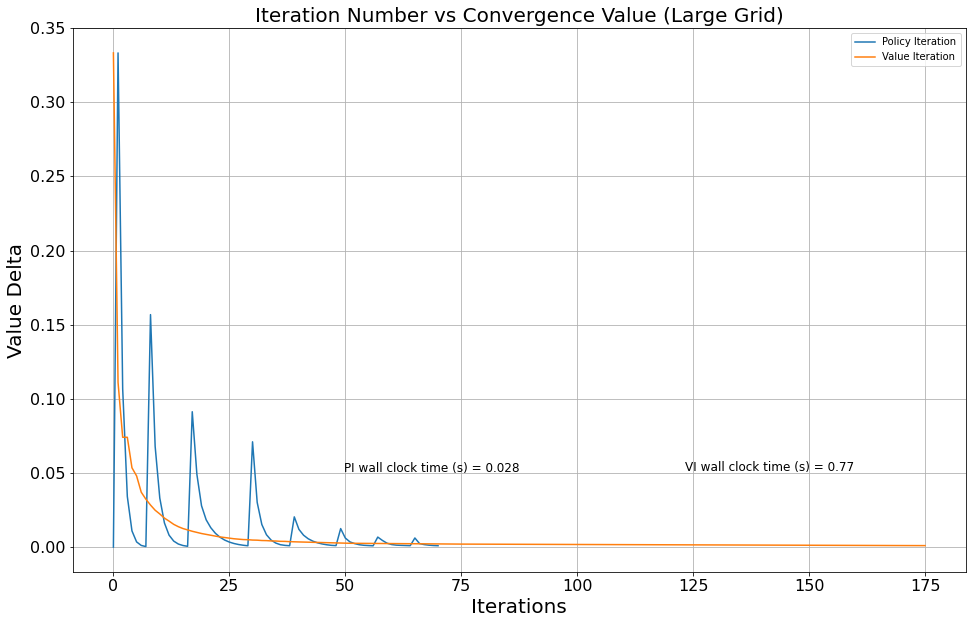

In [188]:

  
# plot lines

plt.figure(figsize=(16,10))
plt.plot(pi_convergence, label = "Policy Iteration")
plt.plot(vi_convergence, label = "Value Iteration")
plt.legend()
plt.title('Iteration Number vs Convergence Value (Large Grid)',fontsize = 20)
plt.xlabel('Iterations',fontsize = 20)
plt.ylabel('Value Delta',fontsize = 20)
plt.grid()
plt.tick_params(labelsize=16)
plt.text(
    x=len(vi_convergence)-.3*len(vi_convergence),y=vi_convergence[-1]+.05,
    s= 'VI wall clock time (s) = {}'.format(round(vi_convergence_time,3)),
    fontsize = 12)
plt.text(
    x=len(pi_convergence)-.3*len(pi_convergence),y=pi_convergence[-1]+.05,
    s= 'PI wall clock time (s) = {}'.format(round(pi_convergence_time,3)),
    fontsize = 12)
plt.show()

In [189]:
pi_gamma_rewards = []
for g in gamma_list: 
    V, pi_policy, pi_convergence = policy_iter(env, gamma=g, theta=convergence_condition)
    pi_rewards_all_episodes = []
    for episode in range(num_episodes): 
        state = env.reset()
        done = False
        pi_rewards_current_episode = 0
        for steps in range(max_steps_per_episode): 
            action = pi_policy[state]
            new_state, reward, done, info = env.step(action)
            pi_rewards_current_episode += reward
            if done:
                break
            state = new_state
        pi_rewards_all_episodes.append(pi_rewards_current_episode)
    pi_gamma_rewards.append(np.mean(pi_rewards_all_episodes))
    # Calculate and print the average reward per thousand episodes

'''    pi_rewards_per_thosand_episodes = np.split(np.array(pi_rewards_all_episodes),num_episodes/1000)
    count = 1000
    print("********Average reward per thousand episodes********\n")
    for r in pi_rewards_per_thosand_episodes:
        avg_reward = sum(r/1000)
        print(count, ": ", str(avg_reward))
        count += 1000'''
        

'    pi_rewards_per_thosand_episodes = np.split(np.array(pi_rewards_all_episodes),num_episodes/1000)\n    count = 1000\n    print("********Average reward per thousand episodes********\n")\n    for r in pi_rewards_per_thosand_episodes:\n        avg_reward = sum(r/1000)\n        print(count, ": ", str(avg_reward))\n        count += 1000'

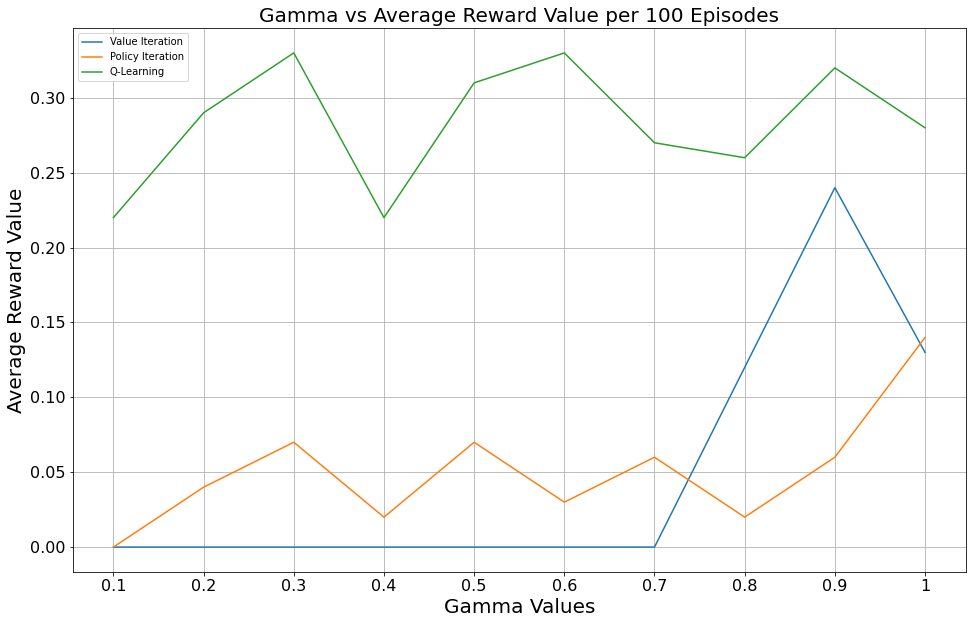

In [190]:
  
# plot lines

plt.figure(figsize=(16,10))
plt.plot(vi_gamma_rewards, label = "Value Iteration")
plt.plot(pi_gamma_rewards, label = "Policy Iteration")
plt.plot(ql_gamma_rewards, label = "Q-Learning")
plt.legend()
plt.title('Gamma vs Average Reward Value per 100 Episodes',fontsize = 20)
plt.xlabel('Gamma Values',fontsize = 20)
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9],labels=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
plt.ylabel('Average Reward Value',fontsize = 20)
plt.grid()
plt.tick_params(labelsize=16)
plt.show()

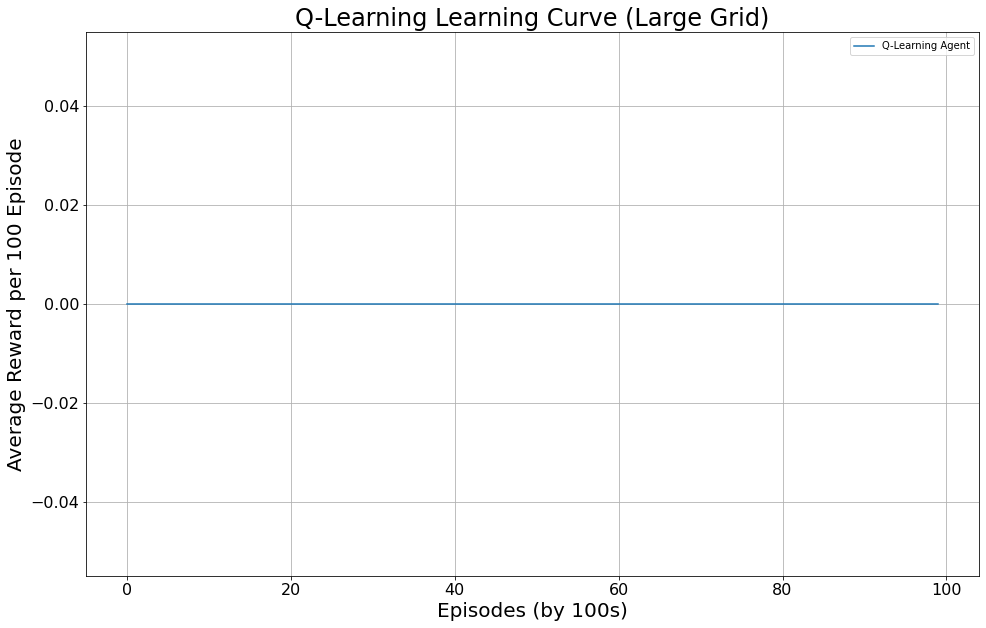

In [191]:
plt.figure(figsize=(16,10))
plt.plot(reward_list, label = 'Q-Learning Agent')
plt.xticks(None)
plt.xlabel('Episodes (by 100s)', fontsize =20 )
plt.ylabel('Average Reward per 100 Episode', fontsize =20 )
plt.title('Q-Learning Learning Curve (Large Grid)', fontsize =24 )
plt.legend()
plt.grid()
plt.tick_params(labelsize=16)
plt.show()